In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [7]:
framingham = pd.read_csv('./framingham.csv')
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
framingham = framingham[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'cigsPerDay', 'TenYearCHD']]
framingham.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,cigsPerDay,TenYearCHD
0,39,195.0,106.0,70.0,26.97,80.0,0.0,0
1,46,250.0,121.0,81.0,28.73,95.0,0.0,0
2,48,245.0,127.5,80.0,25.34,75.0,20.0,0
3,61,225.0,150.0,95.0,28.58,65.0,30.0,1
4,46,285.0,130.0,84.0,23.10,85.0,23.0,0


In [9]:
framingham.describe()

,age,totChol,sysBP,diaBP,BMI,heartRate,cigsPerDay,TenYearCHD
count,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,4211.000000,4240.000000
mean,49.580189,236.699523,132.354599,82.897759,25.800801,75.878981,9.005937,0.151887
std,8.572942,44.591284,22.033300,11.910394,4.079840,12.025348,11.922462,0.358953
min,32.000000,107.000000,83.500000,48.000000,15.540000,44.000000,0.000000,0.000000
25%,42.000000,206.000000,117.000000,75.000000,23.070000,68.000000,0.000000,0.000000
50%,49.000000,234.000000,128.000000,82.000000,25.400000,75.000000,0.000000,0.000000
75%,56.000000,263.000000,144.000000,90.000000,28.040000,83.000000,20.000000,0.000000
max,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,70.000000,1.000000


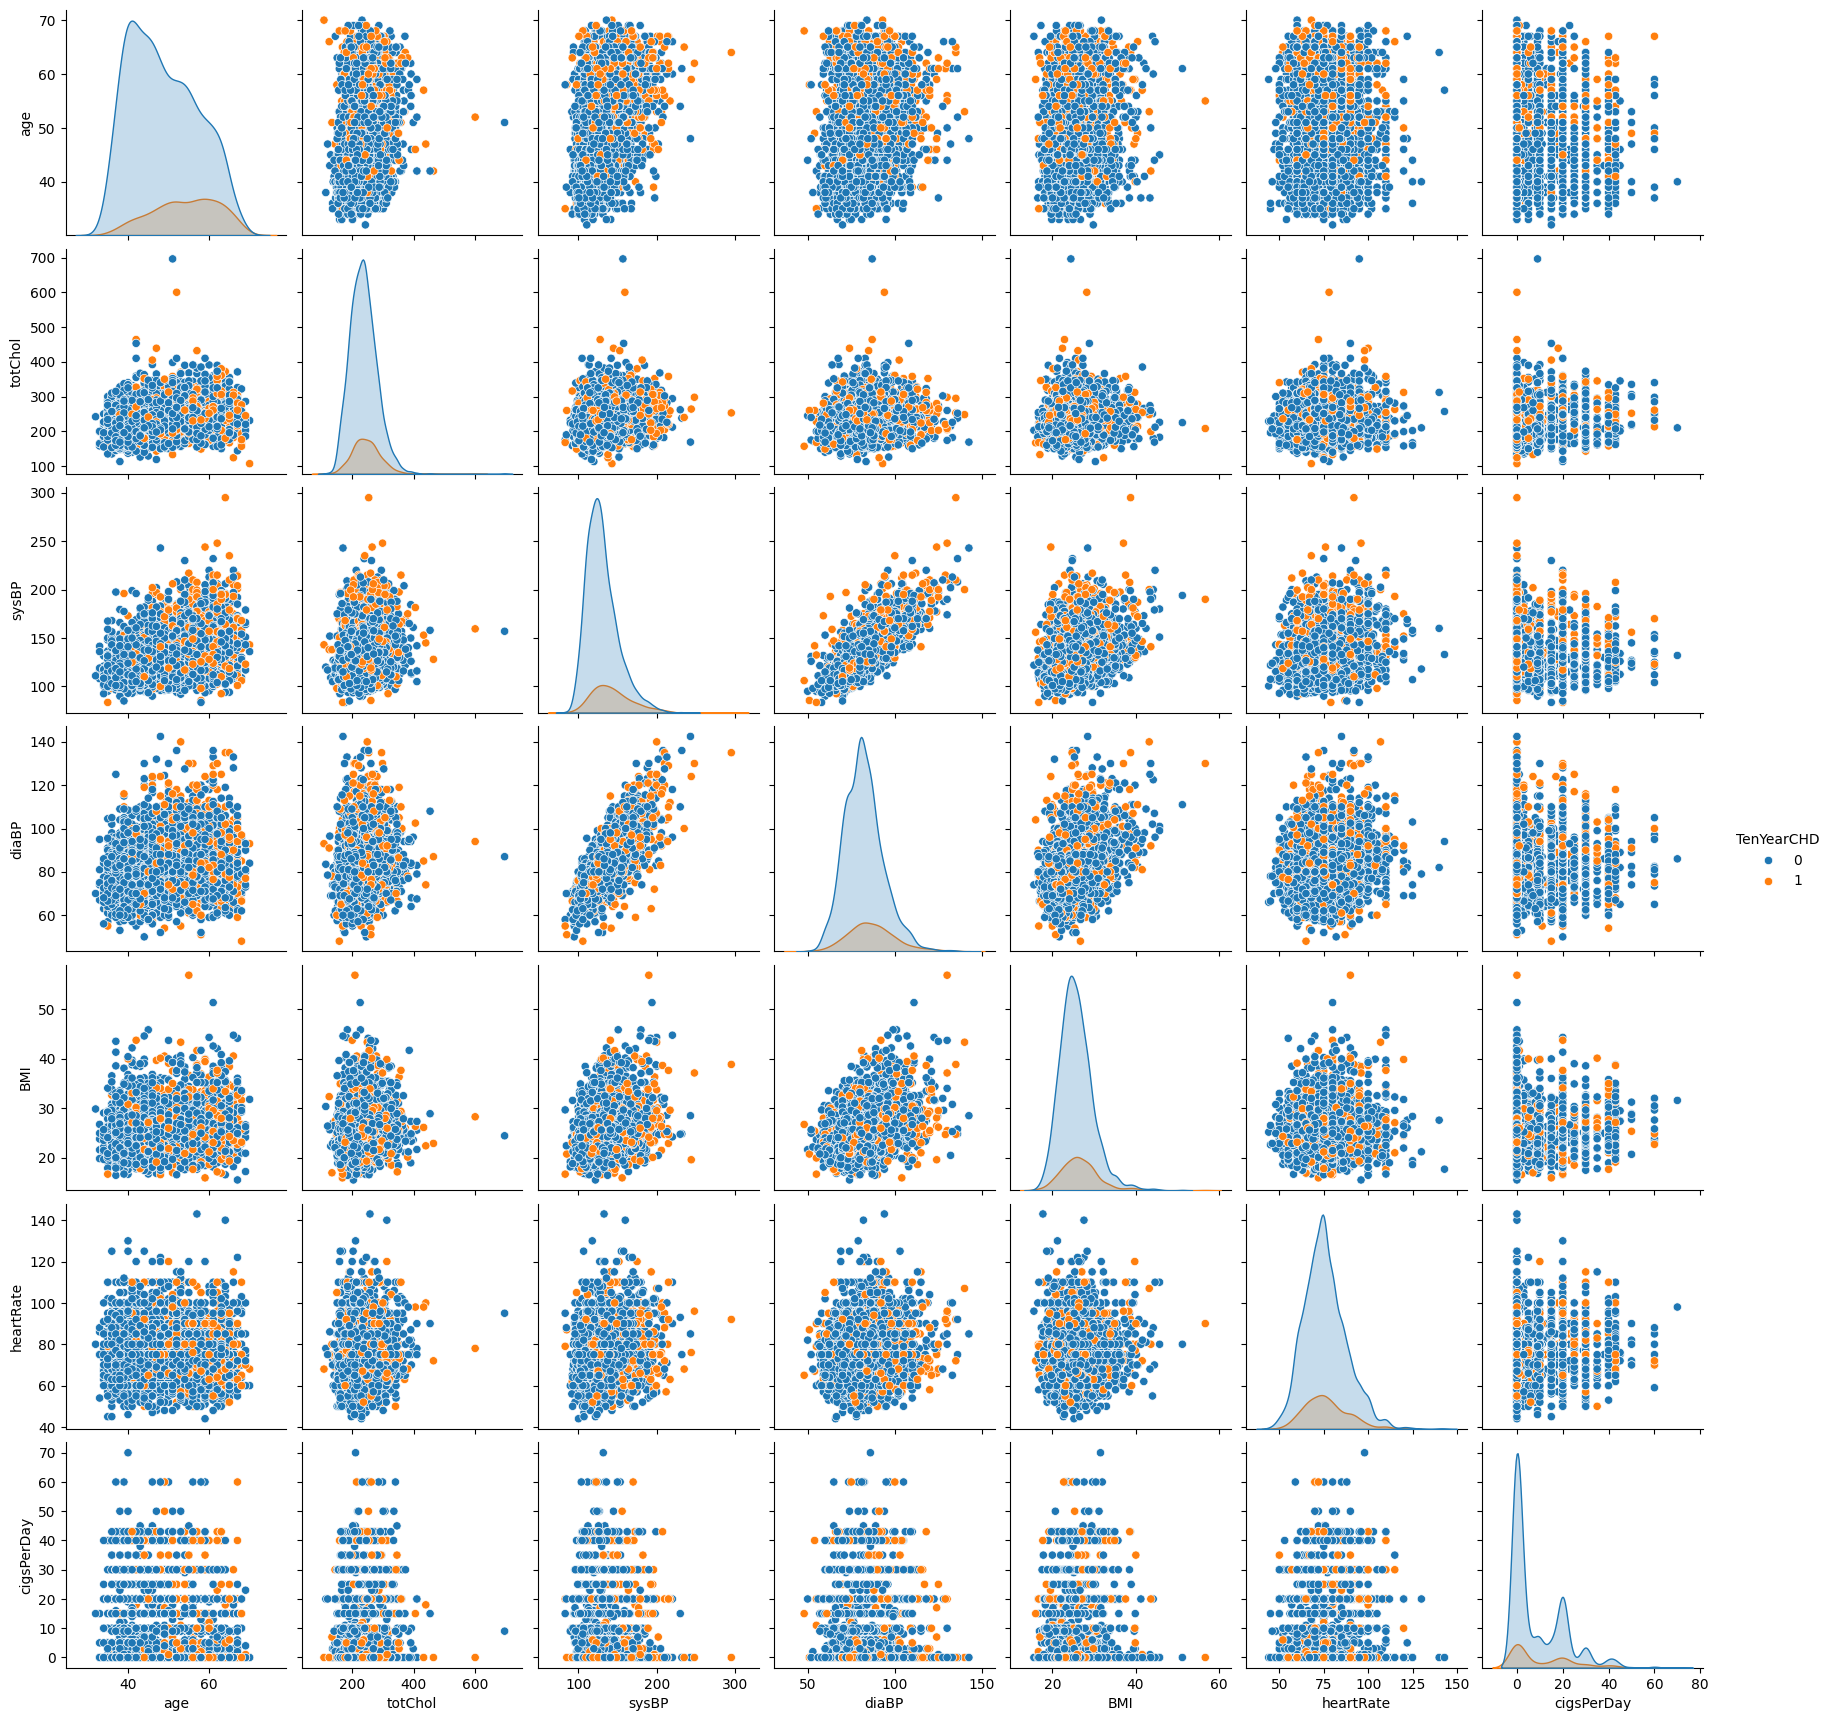

In [ ]:
# graficar 
sns.pairplot(framingham, hue='TenYearCHD')

# Dataste limpio

In [15]:
framingham = framingham.dropna()
framingham.describe()

,age,totChol,sysBP,diaBP,BMI,heartRate,cigsPerDay,TenYearCHD
count,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000,4142.000000
mean,49.546354,236.707388,132.294664,82.903308,25.793300,75.836552,8.985514,0.150169
std,8.556792,44.576586,21.956333,11.871627,4.080127,12.033584,11.917562,0.357280
min,32.000000,113.000000,83.500000,48.000000,15.540000,44.000000,0.000000,0.000000
25%,42.000000,206.000000,117.000000,75.000000,23.060000,68.000000,0.000000,0.000000
50%,49.000000,234.000000,128.000000,82.000000,25.380000,75.000000,0.000000,0.000000
75%,56.000000,263.000000,143.500000,89.500000,28.037500,83.000000,20.000000,0.000000
max,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,70.000000,1.000000


# Regresion Logistica

In [17]:
X = framingham.drop('TenYearCHD', axis=1)
y = framingham['TenYearCHD']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8463395012067578
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1052
           1       0.50      0.03      0.06       191

    accuracy                           0.85      1243
   macro avg       0.67      0.51      0.49      1243
weighted avg       0.80      0.85      0.78      1243



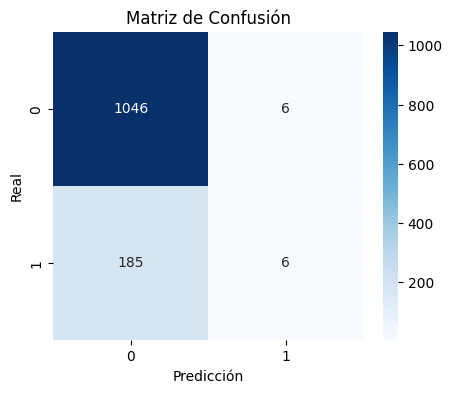

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Proporciones

In [49]:
group1 = framingham[framingham["TenYearCHD"] == 0].drop(columns=["TenYearCHD"]).values
group2 = framingham[framingham["TenYearCHD"] == 1].drop(columns=["TenYearCHD"]).values
N1, N2 = len(group1), len(group2)

τ = 0.8
def proportional_train_test(X1, X2, τ):
    n1, n2 = int(τ*N1), int(τ*N2)
    idx1 = np.random.choice(N1, n1, replace=False)
    idx2 = np.random.choice(N2, n2, replace=False)
    train1, test1 = X1[idx1], np.delete(X1, idx1, axis=0)
    train2, test2 = X2[idx2], np.delete(X2, idx2, axis=0)
    return train1, train2, test1, test2

def equal_train_proportional_test(X1, X2, τ):
    n = int(τ * min(N1, N2))
    idx1 = np.random.choice(N1, n, replace=False)
    idx2 = np.random.choice(N2, n, replace=False)
    train1, test1 = X1[idx1], np.delete(X1, idx1, axis=0)
    train2, test2 = X2[idx2], np.delete(X2, idx2, axis=0)
    return train1, train2, test1, test2

def proportional_train_equal_test(X1, X2, τ):
    n1, n2 = int(τ*N1), int(τ*N2)
    idx1 = np.random.choice(N1, n1, replace=False)
    idx2 = np.random.choice(N2, n2, replace=False)
    train1 = X1[idx1]
    train2 = X2[idx2]
    test1_idx = np.random.choice(list(set(range(N1))-set(idx1)), size=int((1-τ)*min(N1,N2)), replace=False)
    test2_idx = np.random.choice(list(set(range(N2))-set(idx2)), size=int((1-τ)*min(N1,N2)), replace=False)
    return train1, train2, X1[test1_idx], X2[test2_idx]

def equal_train_equal_test(X1, X2, τ):
    n = int(τ * min(N1, N2))
    idx1 = np.random.choice(N1, n, replace=False)
    idx2 = np.random.choice(N2, n, replace=False)
    train1 = X1[idx1]
    train2 = X2[idx2]
    test1_idx = np.random.choice(list(set(range(N1))-set(idx1)), size=int((1-τ)*min(N1,N2)), replace=False)
    test2_idx = np.random.choice(list(set(range(N2))-set(idx2)), size=int((1-τ)*min(N1,N2)), replace=False)
    return train1, train2, X1[test1_idx], X2[test2_idx]


def run_experiment(split_fn):
    train1, train2, test1, test2 = split_fn(group1, group2, τ)
    X_train = np.vstack([train1, train2])
    y_train = np.array([0]*len(train1) + [1]*len(train2))
    X_test = np.vstack([test1, test2])
    y_test = np.array([0]*len(test1) + [1]*len(test2))

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

# --------- Resultados ----------
print("Proporcional - Proporcional:", run_experiment(proportional_train_test))
print("Igual y proporcional:", run_experiment(equal_train_proportional_test))
print("Proporcional  e igual test:", run_experiment(proportional_train_equal_test))
print("Igual e igual:", run_experiment(equal_train_equal_test))


Proporcional - Proporcional: 0.8516284680337757
Igual y proporcional: 0.6569250317662008
Proporcional  e igual test: 0.5282258064516129
Igual e igual: 0.6612903225806451
